In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

px2inch = 1/plt.rcParams['figure.dpi']

## Covariance Matrix Cov

<table>

<tr><td>

````python
# Nº Variables = Nº Rows
#
# Cov = X * X.T
# X
# x1 x2 xn
# y1 y2 yn 
# z1 z2 zn 

#          mean(x)
# Xu = X - mean(y)
#          mean(z)

# Xu         Xu.T         Cov
# x1 x2 xn   x1 y1 z1     Cxx Cxy Cxz
# y1 y2 yn * x2 y2 z2  =  Cyx Cyy Cyz
# z1 z2 zn   xn yn zn     Czx Czy Czz

#
````
</td><td>

````python
# Nº Variables = Nº Cols
#
# Cov = X.T * X
# X
# x1 y1 z1
# x2 y2 z2 
# xn zn zn 

#          
# Xu = X - mean(x) mean(y) mean(z)
#          

# Xu.T       Xu           Cov
# x1 x2 xn   x1 y1 z1     Cxx Cxy Cxz
# y1 y2 yn * x2 y2 z2  =  Cyx Cyy Cyz
# z1 z2 zn   xn yn zn     Czx Czy Czz

# Like Spreadsheet
````

</td></tr>

</table

## PCA sklearn VS PCA implementation

In [27]:
def distance_to_mean(M):
    # M = x1,y1
    #     x2,y2    
    #     xn,yn
    mean_row = np.mean(M,axis=0)
    return np.sqrt( np.sum((M-mean_row)**2,axis=1) ).reshape(-1,1)

def rot_x(theta):
     return np.array([ [ np.cos(theta),np.sin(theta) ],
                       [-np.sin(theta),np.cos(theta) ]])

def plot_eigen_ellipsoid(ax, eigVal, eigVec, eigValPer, center_xy=[0,0]):

    #plot eigen vectors
    colors = ['r','g']
    xc,yc  = center_xy
    for i,(eig_val,eigen_vec) in enumerate(zip(eigVal,eigVec.T)):
        x = np.array([xc,xc+eig_val*eigen_vec[0]])
        y = np.array([yc,yc+eig_val*eigen_vec[1]])
        ax.plot(x,y,color=colors[i],label=f'$PCA_{i+1}$: {100*eigValPer[i]:5.2f}%')
    ax.legend()
    # plot variance ellipsoids
    v  = eigVec[:,0]
    fi = np.arctan2(v[1],v[0])
    t  = np.linspace(0,2*np.pi)
    for var_int in range(1,3+1):
        xe  = var_int*eigVal[0]*np.cos(t).reshape(-1,1)
        ye  = var_int*eigVal[1]*np.sin(t).reshape(-1,1)
        xy_ellip = np.concatenate((xe,ye),axis=1)
        xy_ellip = xy_ellip@rot_x(fi) + center_xy
        ax.plot(xy_ellip[:,0],xy_ellip[:,1],'k',lw=0.65)

def PCA_fun(X,scaled=False):

    # Variables in columns like Spreadsheet
    #   x y z... Varn
    # t1
    # t2
    # tn

    # Nº of samples 
    N,_ = X.shape

    # Data normalization
    Mean_row = np.mean(X,axis=0)
    STD_row  = np.std( X,axis=0)

    if scaled: Xn = (X - Mean_row) / STD_row  # centered and scaled mean,std = 0,1
    else:      Xn = (X - Mean_row)            # centered only       mean = 0 

    # Covariance Matrix (Nsamples,Nvar)
    Cov = ( Xn.T @ Xn )/(N-1)

    eigVal, eigVec = np.linalg.eig(Cov)
    eigValPer      = eigVal/np.sum(eigVal)
    
    # sort the the columns "eigenVectors" in the order
    # of decreasing eigenvalues
    ind = np.argsort(-eigVal)

    return eigVec[:,ind], eigVal[ind], eigValPer[ind] , Cov

def get_rand_cov_mean(lim=10):

    mean = np.random.randint(1,lim,size=2)
    v1   = np.random.randint(1,lim,size=1)[0]
    v2   = np.random.randint(1,lim,size=1)[0]
    v12  = np.random.randint(-lim,lim,size=1)[0]
    cov  = np.array([[v1 ,v12],
                     [v12,v2 ]])
    return mean,cov

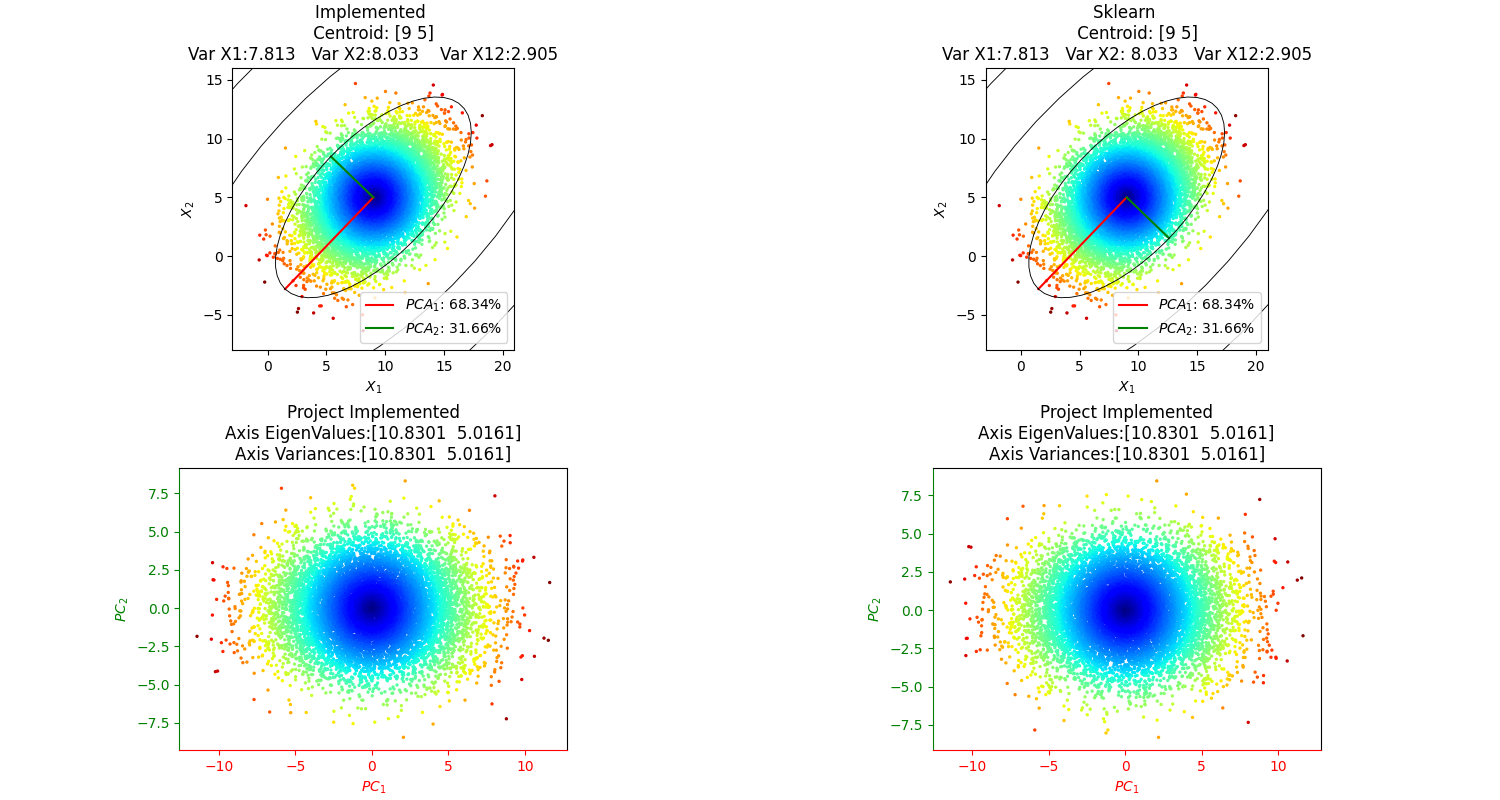

Data:
Covariance
 [[8 3]
 [3 8]]
Mean
 [9 5]
--------------------
Sklearn: 
Covariance
 [[7.81343639 2.90492732]
 [2.90492732 8.03284976]]
Eigen Vectors: PCA components
 [[-0.69363578  0.72032591]
 [-0.72032591 -0.69363578]]
Eigen Values: PCA axis variances
 [10.83014124  5.01614492]
PCA values % 
 [0.68344981 0.31655019]
--------------------
Implementation: 
Covariance
 [[7.81343639 2.90492732]
 [2.90492732 8.03284976]]
Eigen Vectors: PCA components
 [[-0.69363578 -0.72032591]
 [-0.72032591  0.69363578]]
Eigen Values: PCA axis variances
 [10.83014124  5.01614492]
PCA values % 
 [0.68344981 0.31655019]




In [28]:
# Data  X(N,2)
N   = 10000
rng = np.random.RandomState(int(np.random.rand()*1e6))
mean,cov = get_rand_cov_mean()
X = rng.multivariate_normal(mean=mean, cov=cov, size=N)


# Implementation eigVec == COLUMNS
eigVec, eigVal, eigValPer, Cov = PCA_fun(X,scaled=False)

# While traditionally eigenvectors are stored as columns in the loadings matrix
# sklearn.PCA stores them as rows in components_
# Sklearn eigVec == ROWS
pca               = PCA().fit(X)
eigVec_sklearn    = pca.components_.T # Transpose
eigVal_sklearn    = pca.explained_variance_
eigValPer_sklearn = pca.explained_variance_ratio_
Cov_sklearn       = pca.get_covariance()

fig, ax = plt.subplots(2,2,figsize=(1500*px2inch,800*px2inch),constrained_layout=True)
cmap    = 'jet' 
ax      = ax.flatten()
color   =  distance_to_mean(X)

ax[0].scatter(X[:,0], X[:,1], c=color ,s=2, cmap=cmap)
ax[1].scatter(X[:,0], X[:,1], c=color ,s=2, cmap=cmap)

plot_eigen_ellipsoid(ax[0],eigVal        , eigVec,         eigValPer,         center_xy=mean)
plot_eigen_ellipsoid(ax[1],eigVal_sklearn, eigVec_sklearn, eigValPer_sklearn, center_xy=mean)

k    = 1
xlim = [np.floor(np.min(X[:,0]))-k, np.ceil(np.max(X[:,0]))+k]
ylim = [np.floor(np.min(X[:,1]))-k, np.ceil(np.max(X[:,1]))+k]
plot_sets(ax[0], gr=False, ar=1, xli=xlim, yli=ylim, xla='$X_1$', yla='$X_2$',ti=f'Implemented \n Centroid: {mean} \nVar X1:{Cov_sklearn[0,0]:0.3f}   Var X2:{Cov_sklearn[1,1]:0.3f}    Var X12:{Cov_sklearn[0,1]:0.3f}')
plot_sets(ax[1], gr=False, ar=1, xli=xlim, yli=ylim, xla='$X_1$', yla='$X_2$',ti=f'Sklearn \n     Centroid: {mean} \nVar X1:{Cov[0,0]:0.3f}   Var X2: {Cov[1,1]:0.3f}   Var X12:{Cov[0,1]:0.3f}')

# Project data into the new PCAs
X     = X - np.mean(X,axis=0)
Xp    = X @ eigVec
uXp   = np.mean(Xp,axis=0)
VarXp = np.sum( (Xp-uXp)**2, axis=0)/(N-1)

ax[2].scatter(Xp[:,0] ,Xp[:,1], c=color ,s=2, cmap=cmap)
plot_sets(ax[2], gr=False, ar=1, xla='$PC_1$', yla='$PC_2$',ti=f'Project Implemented\nAxis EigenValues:{np.round(eigVal,4)}\nAxis Variances:{np.round(VarXp,4)}')

Xp    = X @ eigVec_sklearn
uXp   = np.mean(Xp,axis=0)
VarXp = np.sum( (Xp-uXp)**2, axis=0)/(N-1)
ax[3].scatter(Xp[:,0] ,Xp[:,1], c=color ,s=2, cmap=cmap)
plot_sets(ax[3], gr=False, ar=1, xla='$PC_1$', yla='$PC_2$',ti=f'Project Implemented\nAxis EigenValues:{np.round(eigVal,4)}\nAxis Variances:{np.round(VarXp,4)}')

# axis colors
ax[2].tick_params(axis='x', colors='r');ax[2].tick_params(axis='y', colors='g')
ax[2].spines['bottom'].set_color('r');  ax[2].spines['left'].set_color('g')
ax[2].xaxis.label.set_color('r');       ax[2].yaxis.label.set_color('g')
ax[3].tick_params(axis='x', colors='r');ax[3].tick_params(axis='y', colors='g')
ax[3].spines['bottom'].set_color('r');  ax[3].spines['left'].set_color('g')
ax[3].xaxis.label.set_color('r');       ax[3].yaxis.label.set_color('g')

plt.show()

print_data = True

if print_data:

    print('Data:')
    print('Covariance\n',cov)
    print('Mean\n',mean)

    print('--'*10);print('Sklearn: ')
    print('Covariance\n'                        ,Cov_sklearn)
    print('Eigen Vectors: PCA components\n'     ,eigVec_sklearn)
    print('Eigen Values: PCA axis variances\n'  ,eigVal_sklearn)
    print('PCA values % \n'                     ,pca.explained_variance_ratio_)

    print('--'*10);print('Implementation: ')
    print('Covariance\n'                        ,Cov )
    print('Eigen Vectors: PCA components\n'     ,eigVec)
    print('Eigen Values: PCA axis variances\n'  ,eigVal)
    print('PCA values % \n'                     ,eigValPer)
    print('\n')



## Bivariate Normal Distribution

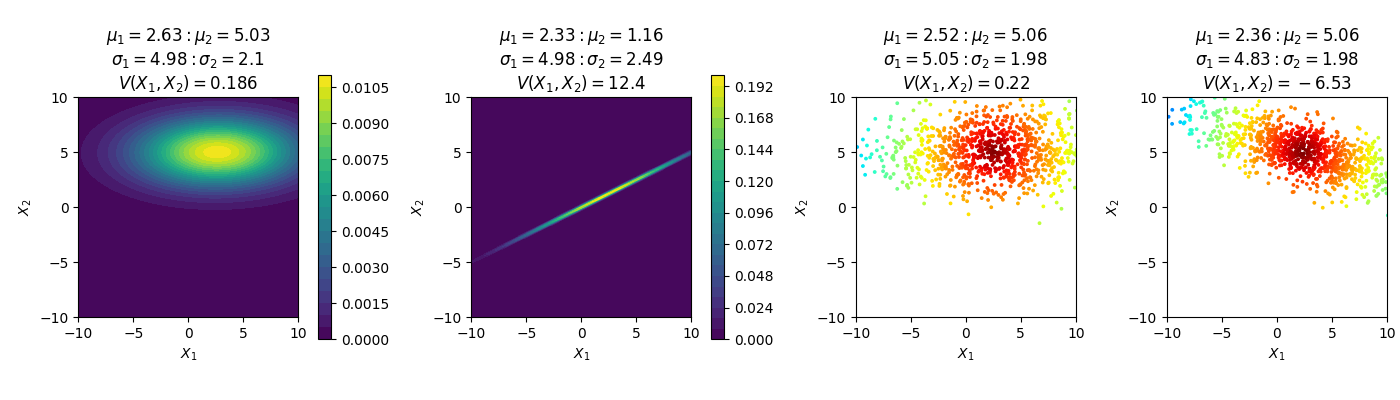

In [29]:
def prob_2D(x1,x2,x1_lims=[-10,10],x2_lims=[-10,10],Nspan=200):
    #ref https://mathworld.wolfram.com/BivariateNormalDistribution.html
    
    # Means
    u1 = np.mean(x1)
    u2 = np.mean(x2)
    # Stds
    s1 = np.sqrt( np.sum((x1-u1)**2)/N )
    s2 = np.sqrt( np.sum((x2-u2)**2)/N )
    # Covariance
    V12 = np.sum( (x1-u1)*(x2-u2) )/N
    # Correlation
    p = V12/(s1*s2)
    if p>0.999: p=0.999 # avoid overflows
    
    x1_span = np.linspace(x1_lims[0],x1_lims[1],Nspan)
    x2_span = np.linspace(x2_lims[0],x2_lims[1],Nspan)
    X1,X2   = np.meshgrid(x1_span,x2_span)
 
    A = 1/(2**np.pi*s1*s2*np.sqrt(1-p**2))

    B = ( ((X1-u1)**2)/s1**2 - (2*p*(X1-u1)*(X2-u2))/(s1*s2) + (X2-u2)**2/s2**2)

    P = A*np.exp(-B/(2*(1-p**2)))

    return X1,X2,P,dict(u1=u1,u2=u2,s1=s1,s2=s2,V12=V12,p=p,)

fig, ax = plt.subplots(1,4,figsize=(1400*px2inch,400*px2inch),constrained_layout=True)


N  = 1000
### CASE 0
################
u1 = 2.5
s1 = 5
u2 = 5
s2 = 2
x1 = np.random.randn(N)*s1 + u1
x2 = np.random.randn(N)*s2 + u2
X1,X2,P,data = prob_2D(x1,x2,x1_lims=[-10,10],x2_lims=[-10,10]) 

con = ax[0].contourf(X1,X2,P,25)
fig.colorbar(con, ax=ax[0], shrink=0.7)
plot_sets(ax[0],gr=False,ar=1,xli=[-10,10],yli=[-10,10],xla='$X_1$',yla='$X_2$',ti=f"$\\mu_1={data["u1"]:0.3} : \\mu_2={data["u2"]:0.3}$\n$\\sigma_1={data["s1"]:0.3} : \\sigma_2={data["s2"]:0.3}$\n$V(X_1,X_2)={data["V12"]:0.3}$")

### CASE 1
################
u1 = 2.5
s1 = 5
x1 = np.random.randn(N)*s1 + u1
x2 = 0.5*x1
X1,X2,P,data = prob_2D(x1,x2,x1_lims=[-10,10],x2_lims=[-10,10]) 

con = ax[1].contourf(X1,X2,P,25)
fig.colorbar(con, ax=ax[1], shrink=0.7)
plot_sets(ax[1],gr=False,ar=1,xli=[-10,10],yli=[-10,10],xla='$X_1$',yla='$X_2$',ti=f"$\\mu_1={data["u1"]:0.3} : \\mu_2={data["u2"]:0.3}$\n$\\sigma_1={data["s1"]:0.3} : \\sigma_2={data["s2"]:0.3}$\n$V(X_1,X_2)={data["V12"]:0.3}$")

### CASE 2
################
C12 = 0
rng = np.random.RandomState()
cov = [[s1**2, C12    ], 
       [C12   , s2**2]]
X    = rng.multivariate_normal(mean=[u1,u2], cov=cov, size=N)
Xu   = np.mean(X,axis=0)
Xs   = np.std(X,axis=0)
Xcov = X-Xu
Xcov = np.sum(Xcov[:,0]*Xcov[:,1],axis=0)/N
cmap = 'jet_r' 
ax[2].scatter(X[:, 0], X[:, 1],c=distance_to_mean(X),s=3, cmap=cmap)
plot_sets(ax[2],gr=False,ar=1,xli=[-10,10],yli=[-10,10],xla='$X_1$',yla='$X_2$',ti=f"$\\mu_1={Xu[0]:5.3} : \\mu_2={Xu[1]:4.3}$\n$\\sigma_1={Xs[0]:5.3} : \\sigma_2={Xs[1]:4.3}$\n$V(X_1,X_2)={Xcov:4.3}$")


### CASE 3
################
C12 = -7
rng = np.random.RandomState()
cov = [[s1**2, C12    ], 
       [C12   , s2**2]]
X    = rng.multivariate_normal(mean=[u1,u2], cov=cov, size=N)
Xu   = np.mean(X,axis=0)
Xs   = np.std(X,axis=0)
Xu   = np.mean(X,axis=0)
Xs   = np.std(X,axis=0)
Xcov = X-Xu
Xcov = np.sum(Xcov[:,0]*Xcov[:,1],axis=0)/N
ax[3].scatter(X[:, 0], X[:, 1],c=distance_to_mean(X),s=3, cmap=cmap)
plot_sets(ax[3],gr=False,ar=1,xli=[-10,10],yli=[-10,10],xla='$X_1$',yla='$X_2$',ti=f"$\\mu_1={Xu[0]:0.3} : \\mu_2={Xu[1]:0.3}$\n$\\sigma_1={Xs[0]:0.3} : \\sigma_2={Xs[1]:0.3}$\n$V(X_1,X_2)={Xcov:0.3}$")

plt.show()